Comparision of Llama2 & Llama2 finetuned

In [1]:
!pip install -q -U rouge-score
!pip install -q -U "git+https://github.com/pltrdy/rouge"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rouge import Rouge
from rouge_score import rouge_scorer

### Check ROGUE_Scorer Package

In [3]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=False)
scores = scorer.score('The quick brown fox jumps over the lazy dog',
                      'The quick brown dog jumps on the log.')
print(scores)
display(pd.DataFrame(scores))

{'rouge1': Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765), 'rouge2': Score(precision=0.2857142857142857, recall=0.25, fmeasure=0.26666666666666666), 'rougeL': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471)}


,rouge1,rouge2,rougeL
0,0.750000,0.285714,0.625000
1,0.666667,0.250000,0.555556
2,0.705882,0.266667,0.588235


### Check ROGUE Package

In [4]:
hypothesis = "the #### transcript is a written version of each day 's cnn student news program use this transcript to he    lp students with reading comprehension and vocabulary use the weekly newsquiz to test your knowledge of storie s you     saw on cnn student news"

reference = "this page includes the show transcript use the transcript to help students with reading comprehension and     vocabulary at the bottom of the page , comment for a chance to be mentioned on cnn student news . you must be a teac    her or a student age # # or older to request a mention on the cnn student news roll call . the weekly newsquiz tests     students ' knowledge of even ts in the news"

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)
display(pd.DataFrame(scores))

,rouge-1,rouge-2,rouge-l
0,"{'r': 0.42857142857142855, 'p': 0.583333333333...","{'r': 0.18571428571428572, 'p': 0.317073170731...","{'r': 0.3877551020408163, 'p': 0.5277777777777..."


### Global Constants

In [27]:
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
DATA_PATH ="/content/drive/MyDrive/Text2SQL/Data/"
DS_DIR = "sql_train_test"
PKL_DIR = "test/"
PKL_FILE ="sql_test.pkl"
LLAMA_PKL_FILE="sql_test_Llama2.pkl"
LLMRES_PKL_FILE="sql_test_llmres.pkl"

RES_PATH="/content/drive/MyDrive/Text2SQL/Results/"
LLAMA_RES_FILE="llama_rogue.csv"
FINETUNE_RES_FILE="finetune_rogue.csv"

FIG_PATH="/content/drive/MyDrive/Text2SQL/Figs/"
FIG_NAME="ROGUE_Scores_Llama_vs_Finetune.png"

### Common Functions

In [30]:
def compute_rogue(df):
  '''Computes Avg ROGUE Scores: ROGUE-1,2,L and returns results as Dataframe'''
  rouge = Rouge()
  df_res = df['eval_res'].tolist()
  df_ref = df['response'].tolist()

  rogue_dict = rouge.get_scores(df_res, df_ref, avg=True)
  rogue_df = pd.DataFrame(rogue_dict)
  return rogue_df

In [32]:
def create_plt_df(df, index_names=['metric', 'type'], column_names=['llama2']):
  plt_df = pd.DataFrame(df.unstack(), columns=column_names)
  plt_df.reset_index(names=index_names, inplace=True)
  plt_df[index_names[1]] = plt_df[index_names[1]].map({'r': 'Recall', 'p':'Precision', 'f':'F1-Score'})
  return plt_df

In [54]:
import pandas as pd

file_path = "/content/drive/MyDrive/Text2SQL/Data/test/sql_test_Llama2.pkl"
llama_df = pd.read_pickle(file_path)
display(llama_df.head(2))

,response,question,context,__index_level_0__,text,eval_res,eval_time
0,"SELECT T2.name, COUNT(*) FROM race AS T1 JOIN ...",Show the name of track and the number of races...,"CREATE TABLE track (name VARCHAR, track_id VAR...",429,### Instruction:\n You are a powerful text-...,1. SELECT COUNT(*) FROM race WHERE track_id = ...,4.275261
1,"SELECT T3.Shop_Name, T2.Carrier FROM stock AS ...",Show names of shops and the carriers of device...,"CREATE TABLE shop (Shop_Name VARCHAR, Shop_ID ...",2907,### Instruction:\n You are a powerful text-...,"SELECT s.shop_name AS 'Shop Name',s.shop_id as...",13.616137


In [55]:
import pandas as pd

file_path = "/content/drive/MyDrive/Text2SQL/Data/test/sql_test_llmres.pkl"
finetune_df = pd.read_pickle(file_path)
display(finetune_df.head(2))

,response,question,context,__index_level_0__,text,eval_res,eval_time
0,"SELECT T2.name, COUNT(*) FROM race AS T1 JOIN ...",Show the name of track and the number of races...,"CREATE TABLE track (name VARCHAR, track_id VAR...",429,### Instruction:\n You are a powerful text-...,"SELECT T1.name, COUNT(*) FROM track AS T1 JOIN...",29.298031
1,"SELECT T3.Shop_Name, T2.Carrier FROM stock AS ...",Show names of shops and the carriers of device...,"CREATE TABLE shop (Shop_Name VARCHAR, Shop_ID ...",2907,### Instruction:\n You are a powerful text-...,"SELECT T1.Shop_name, T2.carrier FROM stock AS ...",29.261944


In [38]:
llama_df['response'][4]

'SELECT LOCATION FROM cinema WHERE capacity > 300 GROUP BY LOCATION HAVING COUNT(*) > 1'

In [39]:
llama_df['eval_res'][4]

'1 location has more than one cinema with capacity over 300'

In [40]:
finetune_df['eval_res'][4]

'SELECT LOCATION FROM cinema WHERE capacity > 300 GROUP BY LOCATION HAVING COUNT(*) >= 2'

### Llama2 ROGUE Score
r-Recall; p-Precision; f-F1 Score

In [41]:
llama_rogue = compute_rogue(df=llama_df)
display(llama_rogue)

,rouge-1,rouge-2,rouge-l
r,0.488056,0.240862,0.470900
p,0.334701,0.157074,0.323433
f,0.372280,0.176018,0.359667


In [43]:
import os
RES_PATH = "/content/drive/MyDrive/Text2SQL/Results/"
LLAMA_RES_FILE = "llama_results.csv"
os.makedirs(RES_PATH, exist_ok=True)

In [44]:
llama_rogue.to_csv(RES_PATH + LLAMA_RES_FILE)

In [45]:
l2_rogue = create_plt_df(llama_rogue, index_names=['metric', 'type'], column_names=['llama2'])
display(l2_rogue)

,metric,type,llama2
0,rouge-1,Recall,0.488056
1,rouge-1,Precision,0.334701
2,rouge-1,F1-Score,0.372280
3,rouge-2,Recall,0.240862
4,rouge-2,Precision,0.157074
5,rouge-2,F1-Score,0.176018
6,rouge-l,Recall,0.470900
7,rouge-l,Precision,0.323433
8,rouge-l,F1-Score,0.359667


### Llama2 Fine-Tune ROGUE Score
r-Recall; p-Precision; f-F1 Score

In [46]:
finetune_rogue = compute_rogue(df=finetune_df)
display(finetune_rogue)

,rouge-1,rouge-2,rouge-l
r,0.878781,0.647866,0.858908
p,0.738621,0.559891,0.722062
f,0.788374,0.586828,0.770517


In [47]:
finetune_rogue.to_csv(RES_PATH + FINETUNE_RES_FILE)

In [48]:
ft_rogue = create_plt_df(finetune_rogue, index_names=['metric', 'type'], column_names=['finetuned'])
display(ft_rogue)

,metric,type,finetuned
0,rouge-1,Recall,0.878781
1,rouge-1,Precision,0.738621
2,rouge-1,F1-Score,0.788374
3,rouge-2,Recall,0.647866
4,rouge-2,Precision,0.559891
5,rouge-2,F1-Score,0.586828
6,rouge-l,Recall,0.858908
7,rouge-l,Precision,0.722062
8,rouge-l,F1-Score,0.770517


In [49]:
l2_ft_rogue = l2_rogue.merge(ft_rogue, on=['metric', 'type'], how='inner')
display(l2_ft_rogue)

,metric,type,llama2,finetuned
0,rouge-1,Recall,0.488056,0.878781
1,rouge-1,Precision,0.334701,0.738621
2,rouge-1,F1-Score,0.372280,0.788374
3,rouge-2,Recall,0.240862,0.647866
4,rouge-2,Precision,0.157074,0.559891
5,rouge-2,F1-Score,0.176018,0.586828
6,rouge-l,Recall,0.470900,0.858908
7,rouge-l,Precision,0.323433,0.722062
8,rouge-l,F1-Score,0.359667,0.770517


In [50]:
l2_ft_rogue_plt = l2_ft_rogue.melt(id_vars=['metric','type'], value_vars=['llama2','finetuned'],
                                   var_name='model', value_name='score'
                                   )
display(l2_ft_rogue_plt)

,metric,type,model,score
0,rouge-1,Recall,llama2,0.488056
1,rouge-1,Precision,llama2,0.334701
2,rouge-1,F1-Score,llama2,0.372280
3,rouge-2,Recall,llama2,0.240862
4,rouge-2,Precision,llama2,0.157074
5,rouge-2,F1-Score,llama2,0.176018
6,rouge-l,Recall,llama2,0.470900
7,rouge-l,Precision,llama2,0.323433
8,rouge-l,F1-Score,llama2,0.359667
9,rouge-1,Recall,finetuned,0.878781


In [52]:
import os
FIG_PATH = "/content/drive/MyDrive/Text2SQL/Figs/"
FIG_NAME = "ROGUE_Scores_Llama_vs_Finetune.png"
os.makedirs(FIG_PATH, exist_ok=True)

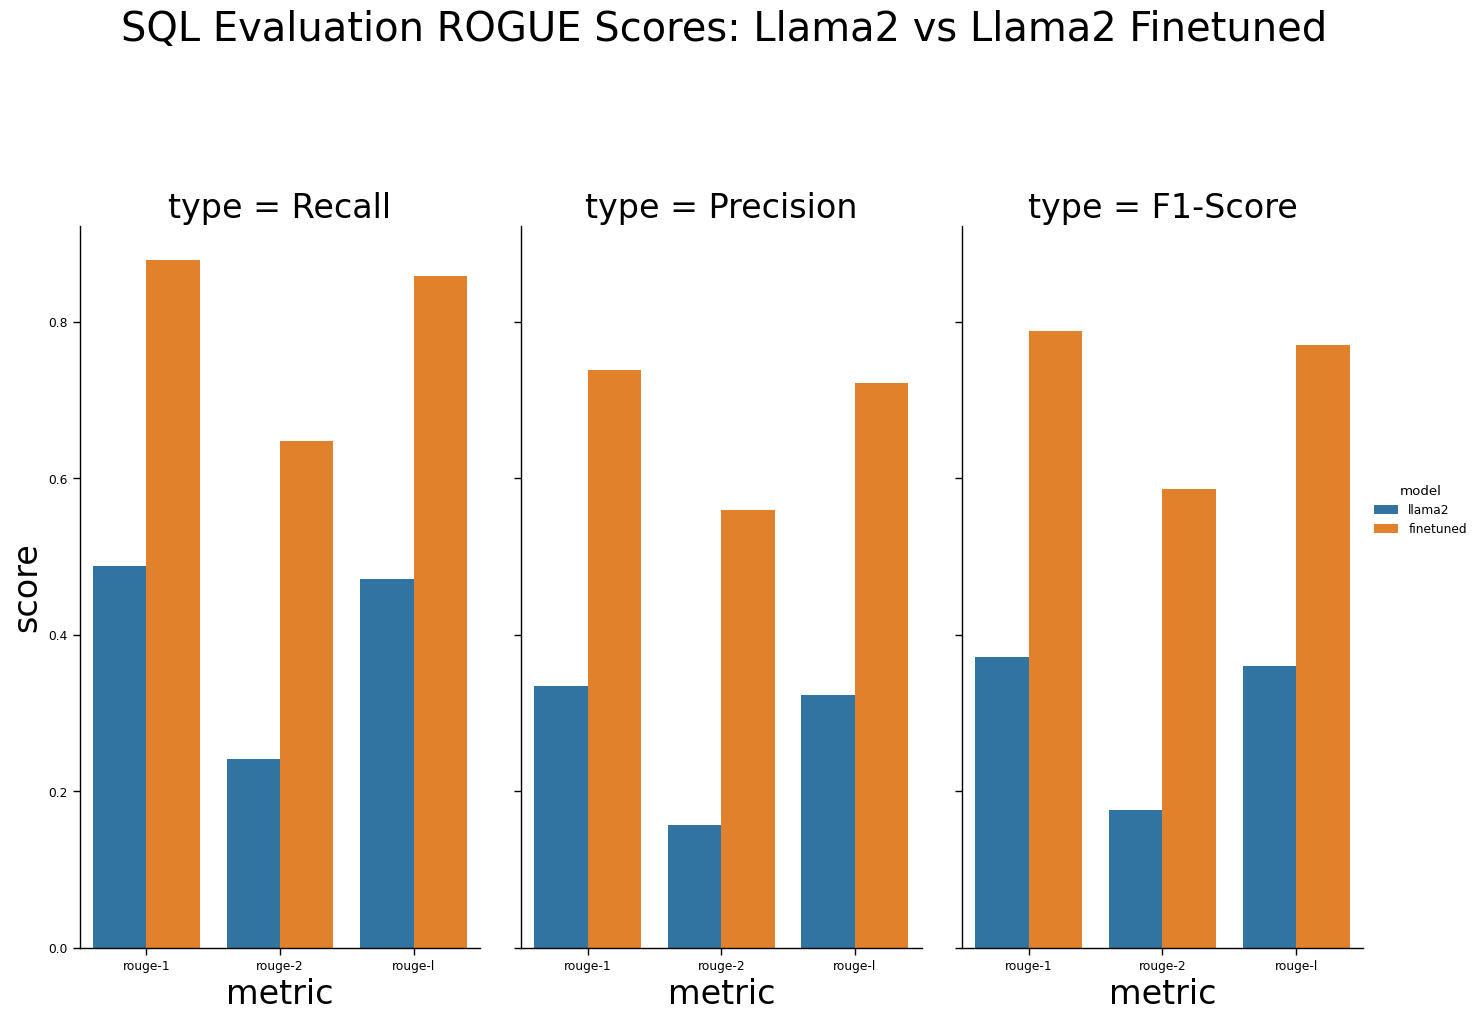

In [53]:
sns.set_context("paper", rc={"font.size":24,"axes.titlesize":30,"axes.labelsize":24})
cat = sns.catplot(x='metric',y='score', hue='model', col='type', kind='bar',
                  data=l2_ft_rogue_plt)
cat.fig.subplots_adjust(top=.8)
cat.fig.suptitle('SQL Evaluation ROGUE Scores: Llama2 vs Llama2 Finetuned')
cat.fig.set_size_inches(15, 12)
plt.savefig(FIG_PATH+FIG_NAME)
plt.show()